In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('test2_modify.csv')
df.describe().columns

Index(['IsCanceled', 'LeadTtime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'Agent', 'Company', 'DaysInWaitingList', 'Adr',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'day_stay',
       'foreigner', 'Country_ratio', 'car_yes', 'RA_changed'],
      dtype='object')

In [3]:
df.columns

Index(['IsCanceled', 'LeadTtime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'Adr', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'day_stay', 'foreigner', 'Country_ratio', 'country_simple', 'car_yes',
       'RA', 'RA_changed'],
      dtype='object')

### EDA
- 그래프를 그리기 위해 column을 골라야 함.
- DataFrame에 feature의 갯수가 많다면, 경우의 수가 너무 많아짐.
- feature selection -> filter, wrapper, embed 

In [4]:
# feature / importance
# --------------------
# ...       ...

In [5]:
# 가장 중요도가 높은 feature
features = ['LeadTtime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled', 
       'BookingChanges', 'DaysInWaitingList', 'Adr', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'day_stay', 'foreigner', 'Country_ratio', 'car_yes',
       'RA_changed']

label = 'IsCanceled'

X, y = df[features], df[label]

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [7]:
model.fit(X, y)

RandomForestClassifier()

In [8]:
model.feature_importances_

array([0.18500736, 0.03415796, 0.08235577, 0.0748904 , 0.03261092,
       0.04952067, 0.01835742, 0.0144437 , 0.00187011, 0.00475418,
       0.02804876, 0.007421  , 0.02717603, 0.00123206, 0.12606278,
       0.02748594, 0.03602892, 0.02347889, 0.05974503, 0.08213249,
       0.03683121, 0.0463884 ])

In [11]:
imp = pd.DataFrame()
imp['feature'] = features
imp['importance'] = model.feature_importances_
imp.sort_values(by='importance', ascending=False).head(5)

,feature,importance
0,LeadTtime,0.185007
14,Adr,0.126063
2,ArrivalDateWeekNumber,0.082356
19,Country_ratio,0.082132
3,ArrivalDateDayOfMonth,0.074890


In [14]:
len(set(df['LeadTtime']))

412

In [15]:
tgt = df.groupby('LeadTtime').agg({label: 'mean'}).reset_index()

In [16]:
import seaborn as sns

<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

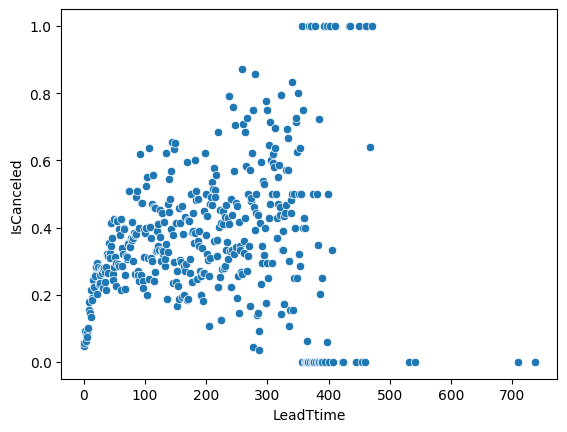

In [17]:
sns.scatterplot(data=tgt, x='LeadTtime', y='IsCanceled')

<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

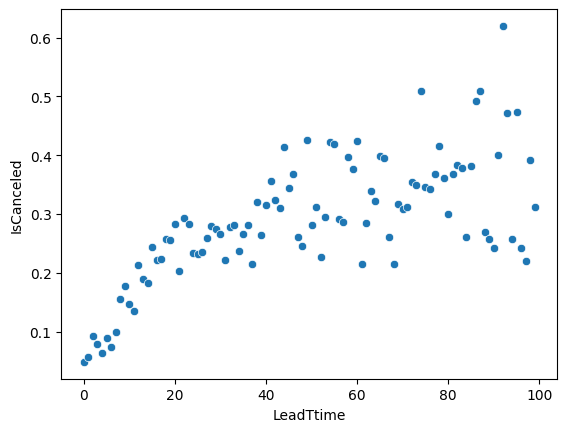

In [18]:
tgt = tgt.loc[tgt['LeadTtime'] < 100]
sns.scatterplot(data=tgt, x='LeadTtime', y='IsCanceled')

# 21일(3주) 전까지 선형 구조를 보임 -> LeadTtime이 길어짐에 따라 예약 취소율이 점점 증가함
# 20~40일 사이에서는 20~30% 정도 취소율을 보임
# 50일 이후부터는 취소율이 다양해짐 -> LeadTtime이 예약 취소율에 미치는 영향이 줄어든다고 해석됨

In [19]:
# LeadTtime별 예약 취소율을 확인할건데
# 내국인과 외국인의 차이가 있을까 ?
tgt = df.groupby(['LeadTtime', 'foreigner']).agg({label:'mean'}).reset_index()
tgt = tgt.loc[tgt['LeadTtime'] < 200]

<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

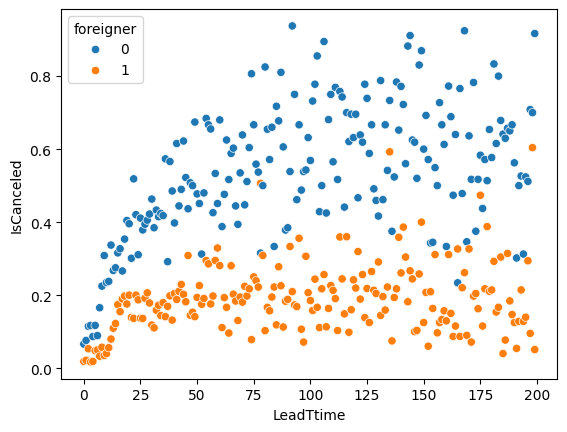

In [20]:
sns.scatterplot(data=tgt, x='LeadTtime', y='IsCanceled', hue='foreigner')

<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

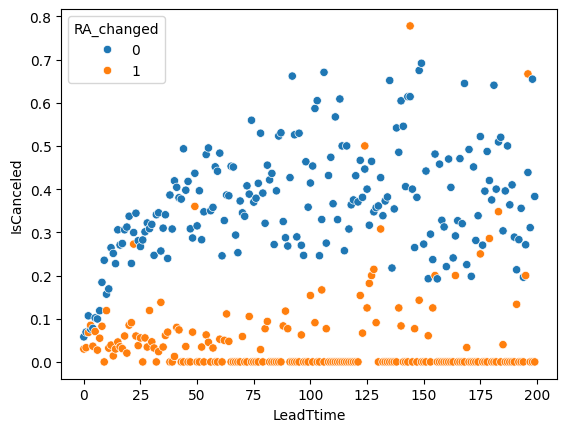

In [18]:
# 예약한 객실과 배정된 객실이 다른 경우
# 예약 취소율에 대한 차이가 있을까 ?
tgt = df.groupby(['LeadTtime', 'RA_changed']).agg({label:'mean'}).reset_index()
tgt = tgt.loc[tgt['LeadTtime'] < 200]
sns.scatterplot(data=tgt, x='LeadTtime', y='IsCanceled', hue='RA_changed')

In [19]:
# 예약 객실을 변경하는 경우 취소율이 현저하게 저하됨. (A 객실 예갹을 b로 변경하는 행사 또는 특전 부여 )

<Axes: xlabel='LeadTtime', ylabel='IsCanceled'>

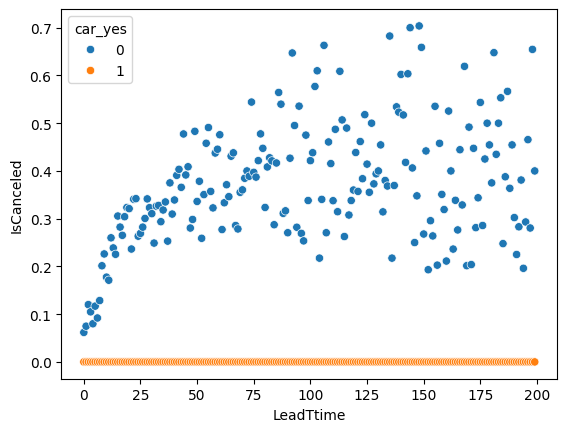

In [22]:
# 차를 가져온다면 예약 취소율이 어떨까 ?
tgt = df.groupby(['LeadTtime', 'car_yes']).agg({label:'mean'}).reset_index()
tgt = tgt.loc[tgt['LeadTtime'] < 200]
sns.scatterplot(data=tgt, x='LeadTtime', y='IsCanceled', hue='car_yes')

In [23]:
# 분석 결과 : 차를 가져 온다면 예약 취소는 거의 안한다 ?

In [24]:
# 어떤 경로로 예약했는지에 대한 column(MarketSegment)을 기반으로 의미있는 문장을 도출하세요.

In [25]:
set(df['MarketSegment'])

{'Complementary',
 'Corporate',
 'Direct',
 'Groups',
 'Offline TA/TO',
 'Online TA'}

In [26]:
df['MarketSegment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups'], dtype=object)

In [27]:
df['MarketSegment'].value_counts()

MarketSegment
Online TA        17655
Offline TA/TO     7427
Direct            6357
Groups            5832
Corporate         2126
Complementary      199
Name: count, dtype: int64

### Data Preparation
- train, test split

In [ ]:
# 가장 중요도가 높은 feature
features = ['LeadTtime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled', 
       'BookingChanges', 'DaysInWaitingList', 'Adr', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'day_stay', 'foreigner', 'Country_ratio', 'car_yes',
       'RA_changed']

label = 'IsCanceled'

In [28]:
train, test = df[0::2], df[1::2]    # start: 0, stop: 마지막, step:2
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

### Modeling

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
X_train

,LeadTtime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,...,BookingChanges,DaysInWaitingList,Adr,RequiredCarParkingSpaces,TotalOfSpecialRequests,day_stay,foreigner,Country_ratio,car_yes,RA_changed
0,342,2015,27,1,0,0,2,0,0,0,...,3,0,0.00,0,0,1,0,0.445247,0,0
1,7,2015,27,1,0,1,1,0,0,0,...,0,0,75.00,0,0,1,1,0.172088,0,1
2,14,2015,27,1,0,2,2,0,0,0,...,0,0,98.00,0,1,1,1,0.172088,0,0
3,0,2015,27,1,0,2,2,0,0,0,...,0,0,107.00,0,0,1,0,0.445247,0,0
4,85,2015,27,1,0,3,2,0,0,0,...,0,0,82.00,0,1,1,0,0.445247,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19793,173,2017,35,27,4,9,2,0,0,0,...,1,0,168.92,0,1,2,0,0.445247,0,0
19794,207,2017,34,26,4,10,2,0,0,0,...,0,0,131.70,0,2,2,1,0.172088,0,0
19795,169,2017,35,30,2,9,2,0,0,0,...,0,0,204.27,0,1,1,1,0.054702,0,0
19796,169,2017,35,30,2,9,2,0,0,0,...,0,0,202.27,0,1,1,1,0.054702,0,0


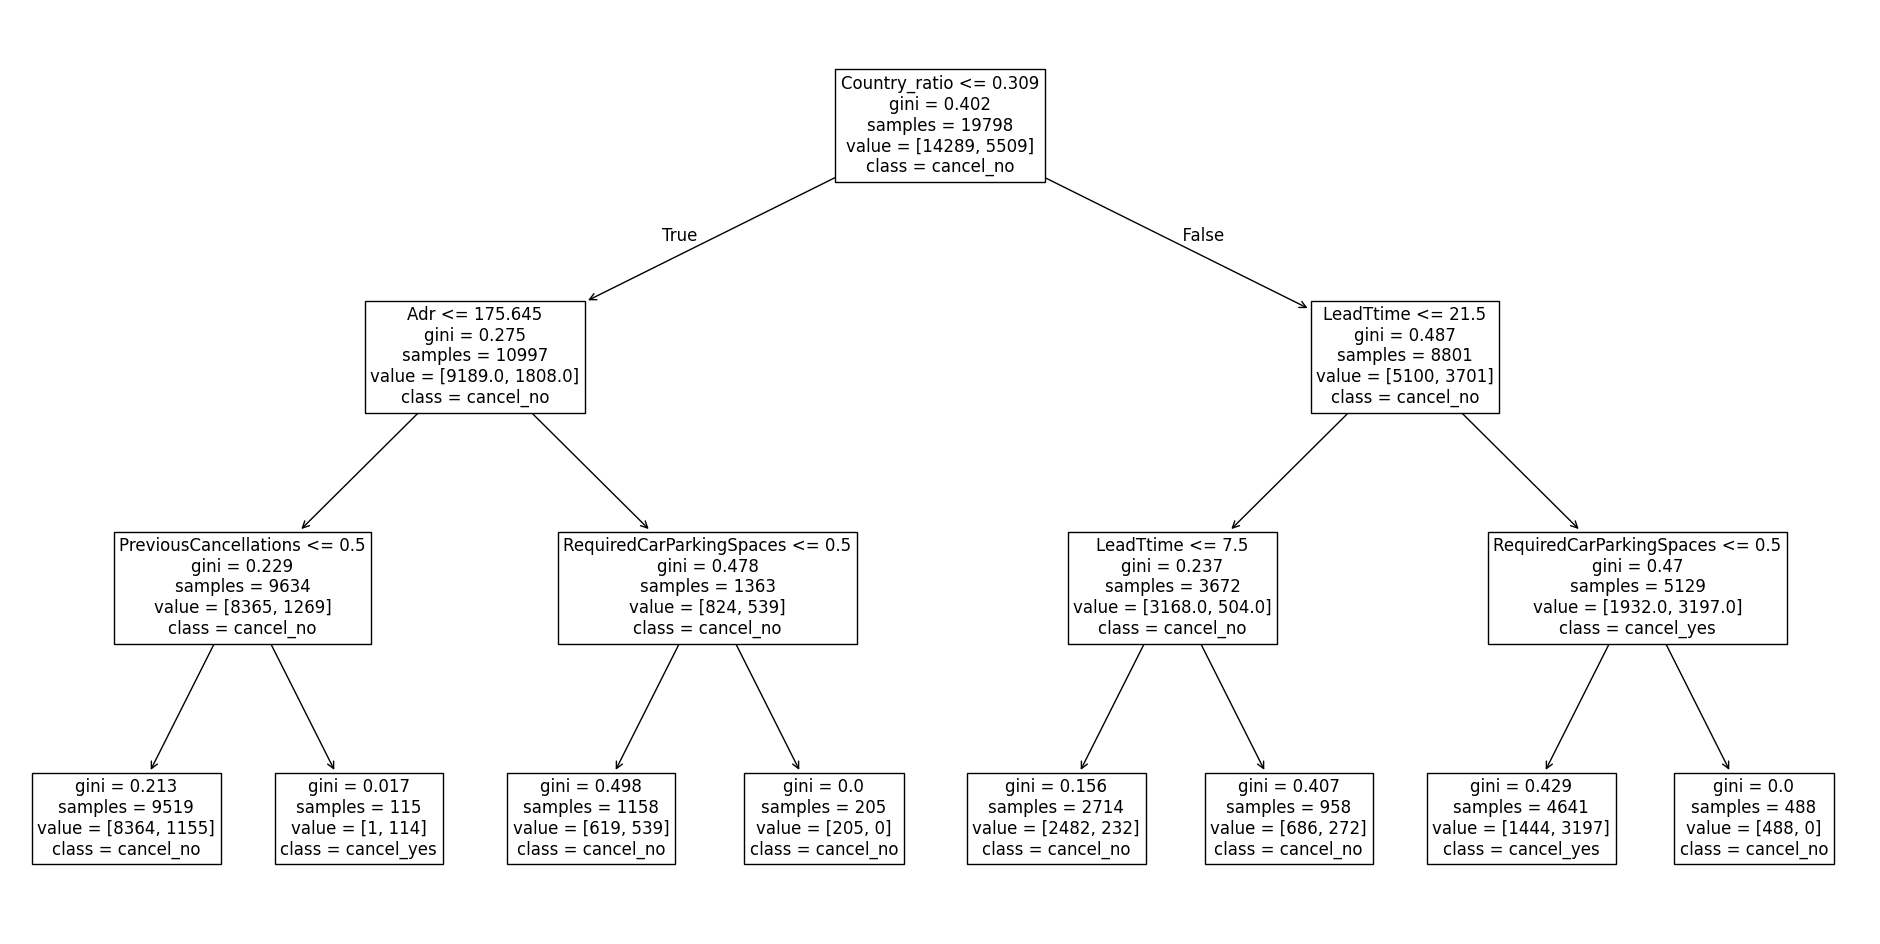

In [31]:
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt

plt.figure(figsize=(24,12))
plot_tree(model, max_depth=3, fontsize=12,
          feature_names=X_train.columns,
          class_names=['cancel_no', 'cancel_yes'])
plt.show()

1. 트리 구조 해석

- 분류 기준: Gini 불순도(Gini impurity)
- 분류 목표: cancel_no (취소 아님), cancel_yes (취소)
- 컬럼 예시:
    - foreigner: 외국인 여부
    - LeadTime: 예약과 실제 숙박 사이의 기간
    - Adr: 평균 일일 요금
    - RequiredCarParkingSpaces: 필요한 주차 공간 수
    - PreviousCancellations: 이전 예약 취소 횟수 등

2. 루트 노드 (맨 위)
- 외국인이 아닌 경우(True) 왼쪽 가지
- 외국인인 경우(False) 오른쪽 가지
- 총 19,798개의 데이터 중 14,289건은 cancel_no, 5,509건은 cancel_yes
- 주요 다수 클래스는 cancel_no

3. 왼쪽 가지 (외국인 아님 → True)

3.1 조건: LeadTime <= 21.5
- 예약일과 숙박일 간의 시간이 21.5일 이하인 경우
- 총 샘플 8,801건 중 cancel_no가 5,100, cancel_yes가 3,701

3.1.1 다음 조건 : RequiredCarParkingSpaces <= 0.5
- 필요 주차 공간이 없는 경우
    - 샘플: 5,129
    - cancel_yes가 많음 → 분류값: cancel_yes
    - 이 노드 밑으로도 분기
        - gini = 0.429, 혼합도 꽤 있음
    - 왼쪽: gini = 0.429,
        - cancel_yes가 다수 (샘플 4,641 중 3,197)
    - 오른쪽: gini = 0.0, cancel_no만 존재 → 488건 전부 cancel_no

- 필요 주차 공간이 있는 경우
    - 샘플: 115
    - 거의 대부분 cancel_yes → 114건
    - gini = 0.017 → 거의 순수한 노드

3.2 조건: LeadTime > 21.5
- 다시 나뉨: LeadTime <= 7.5
- 샘플: 3,672건
    - 왼쪽: cancel_no 다수 → 2,714건
    - 오른쪽: cancel_yes 증가 → 958건 중 272건이 cancel_yes (gini = 0.407)

4. 오른쪽 가지 (외국인임 → False)
4.1 조건: Adr <= 175.645
    - 평균 요금이 낮은 경우 (10,997건)
        - cancel_no가 대부분 → 9,189건
4.1.1 PreviousCancellations <= 0.5
- 이전 취소가 없다면 cancel_no가 대부분
    - 샘플 9,634건 중 8,365건 cancel_no
    - 샘플 9,634건 중 1,269건 cancel_yes
- 이전 취소가 있다면 cancel_yes가 많아짐
    - 샘플: 1,363
    - 아래로 또 분기:
        - 주차 공간 없음(왼쪽): 1,158 cancel_no가 더 많음
        - 주차 공간 있음(오른쪽): 205 전부 cancel_no

In [ ]:
### 지니계수 계산 방식
- 경제적 불평등의 정도를 계수화한 것
- 불순도 확인 ( 불순한 정도 )
- 특정 사건이 일어날 확률 -> yes_prob
- 특정 사건이 일어나지 않을 확률 -> no_prob
- A = yes_prob * ( 1 - yes_prob )
- B = no_prob * ( 1 - no_prob )
- A + B = gini

In [63]:
size = 19798

yes_prob = 5509 / size
no_prob = 14289 / size

A = yes_prob * ( 1 - yes_prob )
B = no_prob * ( 1 - no_prob )

print(A + B)   # 0.402 

0.4016631264997609


In [66]:
yes_prob = 0
no_prob = 1

A = yes_prob * ( 1 - yes_prob )
B = no_prob * ( 1 - no_prob )

print(A + B) 

0


In [32]:
from sklearn.tree import export_graphviz as eg

In [33]:
eg(model,
   out_file='./tree.dot',
   feature_names=features,
   class_names=['cancel_no', 'cancel_yes'],
   rounded=True, # 사각형 끝을 둥글게
   filled=True ) # 사각형 안 색깔 채우기

In [34]:
# 예측한 모형 png로 바꿔서, 시각화 하기
from subprocess import check_call
check_call(['dot', '-Tpng', './tree.dot', '-o', './OutputFile.png'])

0

In [30]:
df.columns

Index(['IsCanceled', 'LeadTtime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'Adr', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'day_stay', 'foreigner', 'Country_ratio', 'country_simple', 'car_yes',
       'RA', 'RA_changed'],
      dtype='object')

In [31]:
set(df['PreviousCancellations'])  # 최대 26번 취소 한경우 존재

{0, 1, 2, 3, 4, 5, 14, 19, 24, 25, 26}

### 알고리즘 구분 용어 ( 대부분이 ensemble, bagging, boosting ) 임
- ensemble : 음악에서 연주할 때 합창, 협주 -> 1인 X, 같이 결과를 도출하는 것 (RandomForest - 여러개의 tree를 도출 )
- 회귀문제 : n개의 알고리즘 결과값(숫자)들의 평균
- 분류분제 : n개의 알고리즘 결과값(경우의 수)들이 투표
- 대표적인 알고리즘 : Random Forest, Extra Trees, Gradient Boosting)
- bagging  
- boosting

### bagging
- bootstrap + aggregation + ing : b + agg + ing
- bootstrap: 데이터 셋의 row를 무작위로 복원 추출 -> 새로운 데이터셋 생성 ( 중복된 row가 있을 수 있음 ) - 여러개 생성
- train  : test > train 데이터 중에서 복원 추출 > 분류 : 투표, 회귀: 평균

- 동일한 데이터와 알고리즘으로 학습함 항상 같은 결과가 나옴 -> bootstrap을 이용하면 새로운 데이터셋을 만들 때마다 row의 구성이 조금씩 다르게 됨
- bootstrap으로 서로 조금씩 다른 데이터셋을 n개 만들고, n개의 데이터셋에 대해 학습은 진행(조금 다르게 학습됨)  -> n개의 합습된 예측 결과를 합산

### boosting : Tuning을 병행해야 함. - 충분한 시간을 가지고 해야함. 그렇지 않으면 RandomForest 추진
- 이전 모델의 오차를 보완하는 방향으로 만들어짐
- 오답을 이용해 점수 상승을 도모, 오답을 새로운 정보로 이용한 접근법 통칭
- 첫 번째 알고리즘으로 학습하고 예측하여 오답 정보를 만듦 > 오답 정보의 문제를 학습대상 데이터셋에 추가해 새로운 데이터셋 생성
- 두 번째 알고리즘으로 새로운 데이터 셋에 대하여 학습하고 예측 오답 정보를 만듬 > n 번 반복 


- 1 문제 풀고 -> 틀린 문제, 2번 타자 1번의 틀린 문제를 풀고 -> 3번 타자 2번 타자가 틀린 문제 풀고 : 정답을 극대화 하는 알고리즘
- 
- actual : 10, predict : 7, error : 3
- actual : 3, predict : 2, error : 1
  actual : 1, predict : 0.5, error : 0.5

- result: 7 + 2 + 0.5 / 10 = 0.95

- 고질적인 문제 : 속도가 늦음 , 이전 학습이 끝나야 다음 학습 (순차적인 학습)

### GBDT ( Gradient Boosted Decision Tree )
- Decision Tree를 사용해 이전 Tree의 오차를 보완하는 방식으로 경사 하강법을 사용해서 ensemable 하는 방법
- XGBoost, CatBoost(러시아), LightGBM(마이크로 소프트)  : 머신러닝에서 사용예장
- bagging은 병렬 처리가 가능하지만 , boosting은 병렬 처리가 안됨.
- XGboost는 기존 Boosting의 문제점을 보완해서 병렬 처리가 어느 정도 가능하게 함. ( 사기업에서 만든 것이 아니라 커뮤니티에서 만듬)

### 분류 문제의 평가 지표
- 회귀 문제에서는 숫자의 크기를 이용해 틀림의 정도를 나타 낼 수 있음.
- 혼동 행렬 개념을 도입

In [1]:
y_true = [1,1,0,0,2,1,0,2,2]
y_pred = [1,1,0,1,1,0,0,2,1]

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)
# 혼동행렬은 모델이 실제값과 예측값을 어떻게 조합했는지 보여준다.

array([[2, 1, 0],
       [1, 2, 0],
       [0, 2, 1]])

In [3]:
import pandas as pd

In [4]:
df = pd.DataFrame({'y_true': y_true, 'y_pred': y_pred})
df

,y_true,y_pred
0,1,1
1,1,1
2,0,0
3,0,1
4,2,1
5,1,0
6,0,0
7,2,2
8,2,1


In [5]:
pd.crosstab(df.y_true, df.y_pred, margins=True)

y_pred,0,1,2,All
y_true,,,,
0,2,1,0,3
1,1,2,0,3
2,0,2,1,3
All,3,5,1,9


In [6]:
df = pd.read_csv('confusion_matrix.csv')
df

,CUST_ID,y_true,y_pred
0,37,0,0
1,51,0,0
2,60,0,0
3,65,0,0
4,73,0,0
...,...,...,...
1788,22320,0,0
1789,22328,1,0
1790,22329,0,0
1791,22342,0,0


In [7]:
pd.crosstab(df.y_true, df.y_pred)

y_pred,0,1
y_true,,
0,1613,22
1,81,77


In [97]:
TN, FP, FN, TP = confusion_matrix(df['y_true'], df['y_pred']).ravel()

In [99]:
print(TN, TP, FN, FP)

1613 77 81 22


In [55]:
#(1613 + 77) / (1613 + 77 + 81 + 22)
TN = 1613
TP = 77
FN = 81
FP = 22

### accuracy (정확도 )
- 예측 결과와 실제 값이 맞은 건수 / 전체 데이터 수

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(df.y_true, df.y_pred)

0.9425543781372002

In [73]:
accuracy = (TP + TN) / (TP + TN + FP + FN)
accuracy

0.9425543781372002

### precision(정밀도)
- 모델이 True라고 분류 한 것 중에서 실제로 True인 것의 비율

In [39]:
from sklearn.metrics import precision_score
precision_score(df.y_true, df.y_pred)

0.7777777777777778

In [67]:
precision = TP / (TP + FP)
precision

0.7777777777777778

### recall( 재현율 )
- 실제 True 인것 중에서 모델이 True 라고 예측한 것의 비율
- 실제 날씨가 맑은 날 중에세 모델이 맑다고 에측한 비율을 나타내는 지표
- sensitivity, hit rate

In [43]:
from sklearn.metrics import recall_score
recall_score(df.y_true, df.y_pred)

0.4873417721518987

In [69]:
recall = TP / ( TP + FN )
recall

0.4873417721518987

In [ ]:
### 언제 accuracy 대시에 precision과 recall 등이 고려될까 ?
- 클래스 불균형 문제가 발생할 때 accuaccy의 의미가 떨어지므로 precision과 recall 사용
- True (90%) 인 경우 False(10 % ) 인 경우 분류 -잘못 맞춤(class imbalance issue)

### specificity(특이도)
- 실제 False인 데이터 중에서 모델이 False라고 예측한 비율 지표

In [45]:
# specificity
recall_score(df.y_true, df.y_pred, pos_label=0)

0.9865443425076452

In [83]:
specificity = TN / ( FP + TN )
specificity

0.9865443425076452

## fall-out(오류율)
- 실제 False 인 데이터중에서 모델이 True라고 예측 잘 못 예측한 비율 

In [47]:
# fall- out, 오류율
1-recall_score(df.y_true, df.y_pred, pos_label=0)

0.013455657492354778

In [79]:
fall_out = FP / (FP + TN)
fall_out

0.01345565749235474

In [ ]:
### F1-Score
- 정밀도와 재현율을 결합한 지표
- 정밀도와 재현율의 차이가 없을 때 높은 값을 가짐

In [8]:
from sklearn.metrics import f1_score
f1_score(df.y_true, df.y_pred)

0.5992217898832685

In [75]:
f1_score = 2 * (( precision * recall ) / (precision + recall))
f1_score

0.5992217898832685

### Precision과 Recall의 차이점

#### 화재 경보 (불이 난 경우 : 1, 불이 안 난 경우: 0)
- FP는 불이 났다고 판단했으나 불이 안 남 -> Dalse Alram
- FN은 불이 안 났다고 판단했으나 불이 남 -> Miss : FN에 비중어 두어야 함
- 화재 경보 관점에서 보면 이러한일을 일어나면 안되는 현상

#### 스팸 메일 분휴 ( 스팸인 경우 : 1, 아닌 경우 : 0 )
- FP는 스팸이라고 판단했으나 스팸이 아님 -> 보안팀에서 찐짜 스팸인지 눈으로 확인
- FN은 스팸이라고 판단했으나 스팸임
- 중요한 메일이 오기로 했는데 스팸으로 분류되면 메일 확인을 못함 -> FP 중점 

#### 환자 검진 (병이 걸린 경우 : 1, 안 걸린 경우 : 0 )
- FP는 병에 걸렸다고 의사가 판했는데 실제로 이상이 없음 (오진)
- FN은 병에 걸리지 안았다고 판단했는데 병에 발생하였음 (오진)
- FP에 중점을 두면 그래도 다행이지만 환자에게 불안감을 증가 시킴,
  FN에 중점을 두면 의사와 환자에게 안 좋음. 

In [9]:
df = pd.read_csv('test2_modify.csv')

features = ['LeadTtime', 'ArrivalDateYear', 'ArrivalDateWeekNumber',
       'ArrivalDateDayOfMonth', 'StaysInWeekendNights', 'StaysInWeekNights',
       'Adults', 'Children', 'Babies', 'IsRepeatedGuest',
       'PreviousCancellations', 'PreviousBookingsNotCanceled',
       'BookingChanges', 'DaysInWaitingList', 'Adr',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'day_stay',
       'foreigner', 'Country_ratio', 'car_yes', 'RA_changed']
label = 'IsCanceled'

train, test = df[0::2], df[1::2]
train, test = train.reset_index(), test.reset_index()

X_train, y_train = train[features], train[label]
X_test, y_test = test[features], test[label]

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=3)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [10]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(19798,))

In [11]:
model.score(X_test,y_test)

0.8233659965653096

In [ ]:
y_test

0        0
1        0
2        0
3        0
4        1
        ..
19793    0
19794    0
19795    0
19796    0
19797    0
Name: IsCanceled, Length: 19798, dtype: int64

In [129]:
for_plot = pd.DataFrame()
for_plot['actual'] = y_test
for_plot['predict'] = model.predict(X_test)
for_plot

,actual,predict
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
19793,0,0
19794,0,0
19795,0,0
19796,0,0


# ROC_AUC ( Receiver Operation Characteristic Curve)
- 분류 모형 성능을 시각화하여 상호 비교 할 수 있음.
- Recall - Fall-out의 변화를 시각화 한것
- 곡선 아래의 면적 - AUC( Area Under Curve )

In [12]:
from sklearn.tree import DecisionTreeClassifier as dt
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import GradientBoostingClassifier as gb

In [13]:
m1, m2, m3 = dt(), rf(), gb()

In [14]:
m1.fit(X_train, y_train)
m2.fit(X_train, y_train)
m3.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
m2.predict_proba(X_test)
#    0 ,    1 > 기준은 0.5 인것 
# 0.88 , 0.12 -> 0이라고 예예측할건데, 확신하는 정도는 88%

array([[0.88, 0.12],
       [0.87, 0.13],
       [0.98, 0.02],
       ...,
       [0.78, 0.22],
       [0.71, 0.29],
       [0.93, 0.07]])

In [15]:
m2.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(19798,))

In [16]:
m1.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], shape=(19798, 2))

In [17]:
r1 = pd.DataFrame(m1.predict_proba(X_test), columns=['neg', 'pos'])
r2 = pd.DataFrame(m2.predict_proba(X_test), columns=['neg', 'pos'])
r3 = pd.DataFrame(m3.predict_proba(X_test), columns=['neg', 'pos'])

In [190]:
r1

,neg,pos
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
19793,1.0,0.0
19794,1.0,0.0
19795,1.0,0.0
19796,0.0,1.0


In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# 좋은 모델일수록 ROC 곡선이 왼쪽 위에 가까움

In [ ]:
x1, y1, _ = roc_curve(y_test, r1['pos'])
print(x1) # fall-out 실제 음성인 데이터를 잘 못 예측한 비율
print(y1) # recall 실제 있는것 중에 예측을 맞춘 것

[0.         0.10878426 0.10878426 0.10885453 0.10906535 0.109487
 0.11096275 0.1111033  0.11173577 0.11314125 0.11412509 0.11503865
 1.        ]
[0.         0.7424569  0.74353448 0.74515086 0.74586925 0.74676724
 0.74928161 0.7498204  0.75053879 0.75143678 0.75143678 0.75143678
 1.        ]


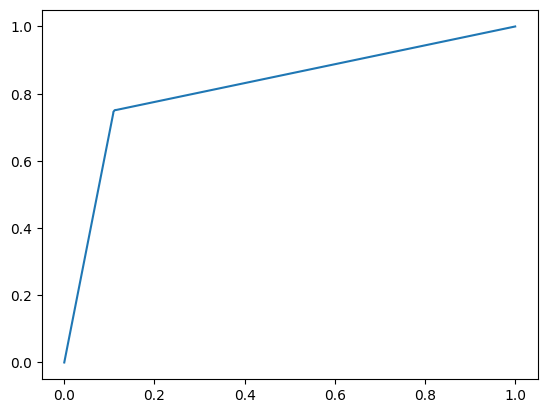

In [193]:
plt.plot(x1, y1, label='DecisionTree')

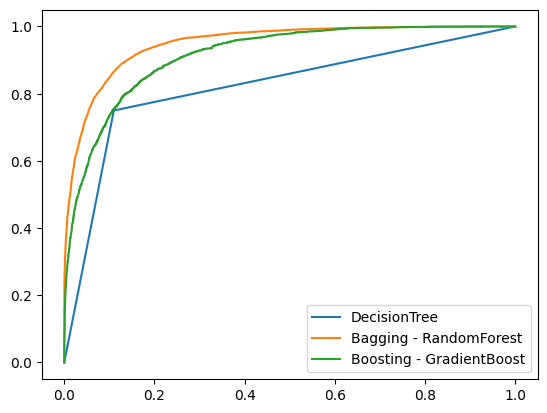

In [194]:
x1, y1, _ = roc_curve(y_test, r1['pos'])
x2, y2, _ = roc_curve(y_test, r2['pos'])
x3, y3, _ = roc_curve(y_test, r3['pos'])

plt.plot(x1, y1, label='DecisionTree')
plt.plot(x2, y2, label='Bagging - RandomForest')
plt.plot(x3, y3, label='Boosting - GradientBoost')

plt.legend()

### ROC_Curve는 어떻게 그려질까 ?
- 확신의 정도와 실제 정답을 이용해 y축을 recall, x축을 fall-out 좌표로 이용

### Hyperparameter Tuning
- Hyperparameter : 사용자가 지정해야만 하는 parameter
- 최적의 옵션값을 찾아 알고리즘 성능을 극대화 시키는 방법

In [19]:
model = rf()
model.fit(X_train, y_train)

for_plot = pd.DataFrame()
for_plot['predict'] = model.predict(X_test)
for_plot['actual'] = y_test

In [20]:
TN, FP, FN, TP = confusion_matrix(for_plot['actual'], for_plot['predict']).ravel()

recall = TP / ( TP + FN )
print(recall)

0.7717313218390804


In [21]:
model = rf(max_depth=10, max_features=0.9)
model.fit(X_train, y_train)

for_plot = pd.DataFrame()
for_plot['predict'] = model.predict(X_test)
for_plot['actual'] = y_test

TN, FP, FN, TP = confusion_matrix(for_plot['actual'], for_plot['predict']).ravel()

recall = TP / ( TP + FN )
print(recall)

0.6724137931034483


In [22]:
def scorer(model):
    model = rf(max_depth=10, max_features=0.9)
    model.fit(X_train, y_train)
    
    for_plot = pd.DataFrame()
    for_plot['predict'] = model.predict(X_test)
    for_plot['actual'] = y_test
    
    TN, FP, FN, TP = confusion_matrix(for_plot['actual'], for_plot['predict']).ravel()
    
    recall = TP / ( TP + FN )

    return recall

In [23]:
model = rf(max_depth=12, max_features=0.7)
scorer(model)

np.float64(0.6758261494252874)

### 접근법 3 가지
- Grid-Search : 격자(방충망)
- random-Search : 무작위 조합
- Optimizer

In [24]:
def scorer(model):
    model.fit(X_train, y_train)
    
    for_plot = pd.DataFrame()
    for_plot['predict'] = model.predict(X_test)
    for_plot['actual'] = y_test
    
    TN, FP, FN, TP = confusion_matrix(for_plot['actual'], for_plot['predict']).ravel()
    
    recall = TP / ( TP + FN )

    return recall

In [25]:
md_ls = [3, 5, 7, 9, 11, 13, 15, 17]
mf_ls = [0.1, 0.3, 0.5, 0.7, 0.9]
all_scores = []

for md in md_ls:
    for mf in mf_ls:
        model = rf(max_depth=md, max_features=mf, n_jobs=-1)
        all_scores.append({'recall' : scorer(model), 'md': md, 'mf': mf})

hyper_df = pd.DataFrame(all_scores)

In [26]:
hyper_df.sort_values(by='recall', ascending=False)

,recall,md,mf
38,0.771731,17,0.7
39,0.771372,17,0.9
37,0.769935,17,0.5
34,0.751257,15,0.9
36,0.746228,17,0.3
33,0.742996,15,0.7
32,0.739224,15,0.5
29,0.718211,13,0.9
31,0.717134,15,0.3
28,0.715697,13,0.7


In [27]:
import time

target_time = 5

t0 = time.time()

while True:
    t1 = time.time() - t0
    if t1 > target_time:
        break

print('박복 끝')

박복 끝


In [28]:
from random import randint

In [29]:
randint ( 1, 999 ) / 1000

0.708

In [ ]:
import time

target_time = 600

t0 = time.time()

# 시간 제한(10분 = 600초) 안에 랜덤 하이퍼파라미터 조합을 무작위로 시도
# 모델 성능(예: recall) 을 측정하고 결과를 기록

while True:
    t1 = time.time() - t0
    if t1 > target_time:
        break

    md = randint(7, 25)
    mf = randint(1, 999) / 1000

    
    model = rf(max_depth=md, max_features=mf, n_jobs=-1)
    all_scores.append({'recall' : scorer(model), 'md': md, 'mf': mf})

hyper_df = pd.DataFrame(all_scores)

In [211]:
hyper_df.sort_values(by='recall', ascending=False).head(10)

,recall,md,mf
71,0.681753,14,0.716
19,0.679777,9,0.900
91,0.679598,10,0.347
214,0.679598,10,0.618
46,0.679418,13,0.262
103,0.679418,17,0.883
50,0.679239,15,0.180
169,0.679239,22,0.691
47,0.679059,24,0.621
18,0.679059,9,0.700
